In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 분석에 필요한 다양한 라이브러리를 import합니다.
1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
    - <https://pandas.pydata.org/docs/user_guide/index.html>

2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
    - <https://numpy.org/doc/stable/>


3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
    - <https://matplotlib.org/stable/users/index>


4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
    - <https://scikit-learn.org/stable/user_guide.html>

In [2]:
pd.set_option('display.max_columns', None)
Data_PATH = '../../Data/tox21_dataset.csv'
df = pd.read_csv(Data_PATH)
df = df.dropna(subset=['NR-AR'])
df = df.drop(columns=['NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'])
df = df.drop(columns='mol_id')
df

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 데이터 로드

학습에 필요한 데이터셋을 로드합니다.

절대경로나 상대경로를 지정하여 학습에 사용될 데이터셋(tox21_dataset.csv)을 pandas의 load_csv 함수를 사용하여 로드합니다.

## 데이터 내의 결측값들을 제거합니다.

반응변수, NR-AR을 제외한 다른 반응변수들은 제거합니다.

## 데이터프레임의 전체적인 모습은 위와 같습니다.

0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## 데이터프레임을 독립 변수와 종속(반응)변수로 나눕니다.

- 독립 변수는 마지막 열을 제외한 모든 열입니다. 
- 종속 변수는 마지막 열입니다.

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

## SMOTE를 수행할 수 있습니다(선택).

위 코드 블럭은 SMOTE를 이용한 데이터 증강을 수행합니다. SMOTE(Synthetic Minority Over-sampling Technique)는 불균형한 데이터셋에서 소수 클래스 데이터를 증강하는 방법입니다. 데이터셋에는 종종 한 클래스의 데이터가 다른 클래스보다 훨씬 많은 경우가 있습니다. 이러한 불균형한 데이터셋을 다룰 때는 모델이 소수 클래스를 제대로 학습하지 못할 수 있습니다. 이를 해결하기 위해 SMOTE는 소수 클래스의 샘플을 증강하여 데이터셋을 균형있게 만듭니다.
- 더 자세한 내용은 아래의 링크를 참조하세요.
  - <https://arxiv.org/pdf/1106.1813.pdf>

In [4]:
from sklearn.cross_decomposition import PLSRegression as plsda

model = plsda(n_components=1, max_iter=500, tol=0.000001)
model.fit(X, y)

PLSRegression(n_components=1)

## 모델을 생성합니다.

학습에 사용할 모델은 **Partial Least Squares Discriminant Analysis (PLSDA)** 입니다.
- Partial Least Squares Discriminant Analysis (PLSDA)는 지도 학습의 차원 축소와 분류 기법으로, 고차원 데이터에서 변수 간의 관계를 모델링하여 주요한 정보를 추출하고, 이를 바탕으로 데이터가 속하는 클래스를 예측합니다. 예측 변수와 반응 변수 사이의 다변량 관계를 탐색할 때 유용하므로, 변수의 개수가 샘플의 수보다 많은 경우에 더욱 유용하게 사용할 수 있습니다.
- 이런 특성으로 생물정보학이나 화학등 여러 분야에서 고차원 데이터 분류 문제에 사용할 수 있습니다.

## Partial Least Squares Discriminant Analysis (PLS-DA)의 주요 하이퍼파라미터

- `n_components`: 모델이 추출할 성분의 수입니다. 이 값은 데이터 세트의 차원을 줄이는 데 사용되며, 모델의 복잡도와 직접적인 관련이 있습니다.
- `scale`: boolean(T/F) 값으로, True일 경우, 각 특성이 평균이 0이고 분산이 1이 되도록 데이터를 스케일링합니다.
- `max_iter`: 알고리즘의 최대 반복 횟수입니다. PLS-DA는 반복적인 최적화 과정을 거치며, 이 매개변수는 해당 과정의 반복 횟수를 제한합니다.
- `tol`: 알고리즘의 수렴 기준으로 사용되는 허용 오차입니다. 이 값은 알고리즘이 수렴했다고 판단되는 수치적 안정성과 정밀도를 결정합니다.

### 사용 시 고려 사항

- PLS-DA는 고차원 데이터에서 유용하게 사용될 수 있으나, `n_components`를 적절히 설정하는 것이 중요합니다. 너무 많은 성분을 사용하면 과적합의 위험이 있으며, 너무 적으면 모델이 데이터의 중요한 정보를 놓칠 수 있습니다.
- 데이터 전처리 과정에서 `scale` 옵션의 사용 여부를 고려해야 합니다. 데이터의 스케일링은 모델의 성능에 큰 영향을 미칠 수 있습니다.
- `max_iter`와 `tol`은 알고리즘의 수렴 속도와 관련이 있으므로, 수렴 문제가 발생하는 경우 이 매개변수들을 조정할 수 있습니다.

### 참고 자료

- 공식 문서 링크: (공식 문서 링크를 여기에 포함시키세요. 예를 들어, PLS-DA가 구현된 scikit-learn, 혹은 다른 라이브러리의 문서 페이지)
- (https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html)


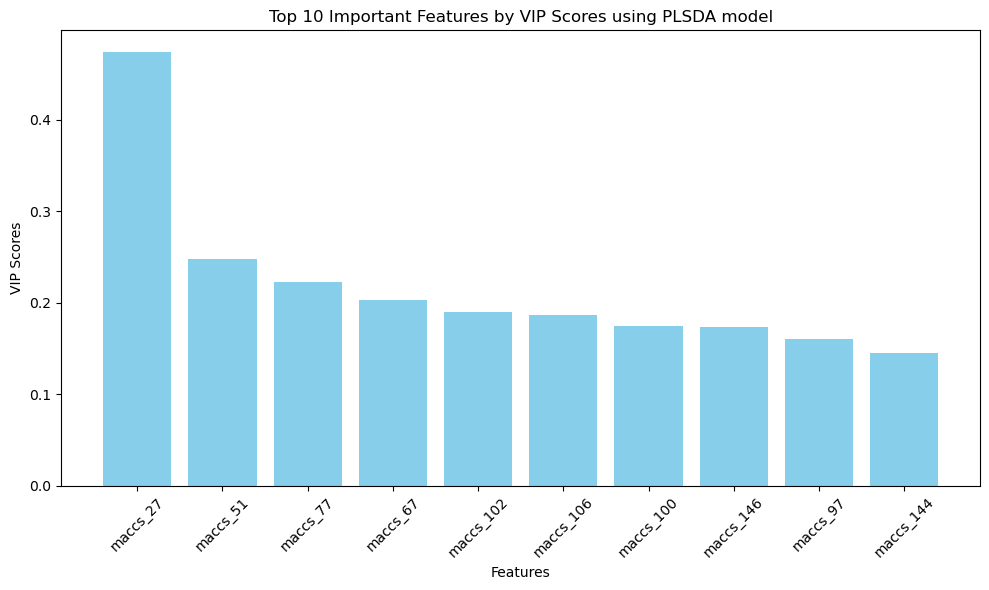

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

# plsda 모델의 feature importance 평가를 위한 vip_score 함수 제작
def vip_score(pls_model):
    t = pls_model.x_scores_  # scores
    w = pls_model.x_weights_  # weights
    q = pls_model.y_loadings_  # Y loadings
    p = np.diag(t.T @ t @ q.T @ q) / pls_model.y_scores_.shape[0]  # scaling factor
    w_squared = np.square(w)
    vip = np.sqrt(np.sum(w_squared * p, axis=1) / np.sum(p))
    return vip

# PLS-DA 모델 학습
model_vip = plsda(n_components=1, max_iter=500, tol=0.000001)
model_vip.fit(X, y)

# VIP 점수 계산
vip_scores = vip_score(model_vip)

# VIP 점수를 기반으로 상위 10개 변수 선정
top_10_features_idx = np.argsort(vip_scores)[-10:][::-1]
top_10_vip_scores = vip_scores[top_10_features_idx]
top_10_feature_names = [f'maccs_{i+1}' for i in top_10_features_idx]

# 상위 10개 변수 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_10_feature_names, top_10_vip_scores, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('VIP Scores')
plt.title('Top 10 Important Features by VIP Scores using PLSDA model')
plt.tight_layout()
plt.show()


## Partial Least Squares Discriminant Analysis (PLS-DA) 시각화

- PLSDA 모델을 사용하여 특성 중요도를 평가하고, Feature Importance가 가장 높은 상위 10개 Feature을 식별하여 시각화하는 코드입니다.
- PLSDA는 Feature Importance 계산 함수를 제공하지 않기에, VIP(Variable Importance in the Projection) 함수를 새롭게 정의하여 점수를 계산하고, 이를 바탕으로 중요도가 높은 feature를 나타내었습니다.

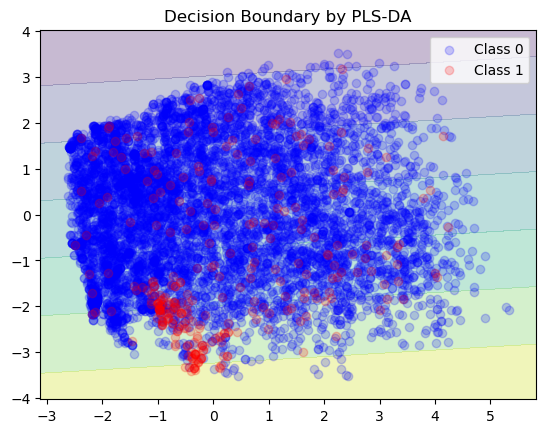

In [6]:
from sklearn.decomposition import PCA

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결정 트리 모델 학습
model_pca = plsda(n_components=1, max_iter=500, tol=0.000001)
model_pca.fit(X_pca, y)

# 결정 경계 시각화를 위한 그리드 생성 
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]

# LightGBM 모델을 사용하여 예측
y_pred = model_pca.predict(X_new).reshape(x1.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.contourf(x1, x2, y_pred, alpha=0.3)
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.2, label='Class 0')
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.2, label='Class 1')
plt.title("Decision Boundary by PLS-DA")
plt.legend()
plt.show()

## 결정 경계 시각화

- 위 그림은 두 Feature를 사용하여 Partial Least Squares Discriminant Analysis를 학습한 결과입니다. 2차원 축을 사용하여 결정 경계를 쉽게 표현할 수 있기에 Feature 개수를 2개로 줄인 후 이를 시각화하였습니다.


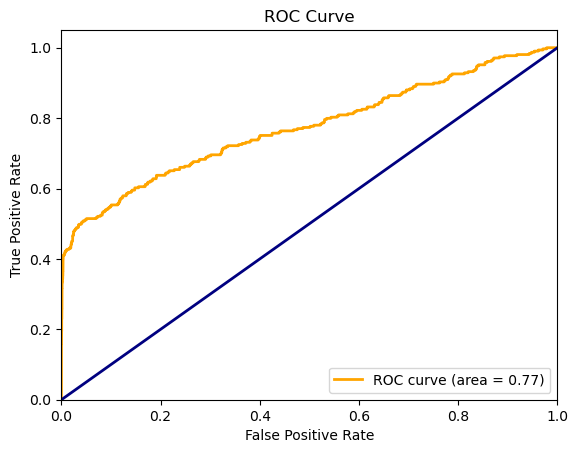

Optimal threshold: 0.15389045958829387


In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# prediction 수행
y_pred_probs = model.predict(X)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y, y_pred_probs)

# ROC 곡선 아래 영역 (AUC) 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 찾기
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)


In [8]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
predict_y = model.predict(X)
predict_y = np.where(predict_y > optimal_threshold, 1, 0)
confusion_matrix(y, predict_y)

array([[6651,  305],
       [ 153,  156]], dtype=int64)

## 혼동 행렬을 출력합니다.

plsda의 출력이 0 또는 1의 이진 값이 아닌 연속형 변수이므로, ROC 곡선의 넓이가 최대가 되도록 하는 임계값을 설정해, 해당 값보다 크다면 1, 작다면 0의 값을 할당하고 이를 바탕으로 혼동행렬을 작성했습니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 6651개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 305개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 153개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 156개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)

**SMOTE 증강기법을 사용한 경우, 또는 모델의 하이퍼파라미터 설정값에 따라 분류 결과가 다르게 나타날 수 있습니다.**